<a href="https://colab.research.google.com/github/caroline-miller0921/advanced_topics/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Check to see if we are running on a GPU or a CPU

tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
# Lets change to GPU
# Go to Runtime
# Click Change runtype type
# Change to GPU
# Run imports again

In [2]:
# Check to see if we are running on a GPU or a CPU

tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
!nvidia-smi

Tue May 23 15:23:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# For the most part you will be working with tensors instead of arrays/matrcies.
# Lets take a look at what a tensor is by making one.

# What is a tensor --> basically data in multiple dimensions

scaler = tf.constant(1)

In [7]:
scaler

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [8]:
scaler.ndim

0

In [9]:
vector = tf.constant([1,2,3])

In [10]:
vector.shape

TensorShape([3])

In [11]:
vector.ndim

1

In [12]:
matrix = tf.constant([[1,2,3],
                     [4,5,6],
                     [7,8,9]])

In [13]:
matrix.shape

TensorShape([3, 3])

In [14]:
matrix.ndim

2

In [15]:
tensor = tf.ones(shape=(2,3,4))

In [16]:
tensor.ndim

3

In [17]:
tensor.shape

TensorShape([2, 3, 4])

In [18]:
tensor

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)>

In [19]:
type(X_train)

numpy.ndarray

In [20]:
# It is good practice to always convert data over to tensors as it provides us extra functionality 
# the same way a numpy array adds extra functionality to a list. Only do this with you features, not target.
X_train = tf.constant(X_train)

X_test = tf.constant(X_test)

In [21]:
type(X_train)

tensorflow.python.framework.ops.EagerTensor

In [22]:
X_train.ndim

3

In [23]:
#peak at the data
#each index is one observation(image) represented in a multi-dimensional tensor
X_train[0]

# value will range from 0 to 255 depending on the pixel in that position

# The smaller numbers closer to zero represent the darker shade while the 
# larger numbers closer to 255 represent the lighter or the white shade.

<tf.Tensor: shape=(28, 28), dtype=uint8, numpy=
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 2

In [24]:
#each individual array is one numpy array representing one row of pixels
X_train[0][0]

<tf.Tensor: shape=(28,), dtype=uint8, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)>

In [25]:
y_train[0]
# these are actual labels of the pictures, see below to the image

5

In [26]:
#how our data is split
print("Train Feature Matrix:", X_train.shape)
print("Test Feature Matrix:", X_test.shape)
print("Train Target Matrix:", y_train.shape)
print("Test Target Matrix:", y_test.shape)

Train Feature Matrix: (60000, 28, 28)
Test Feature Matrix: (10000, 28, 28)
Train Target Matrix: (60000,)
Test Target Matrix: (10000,)


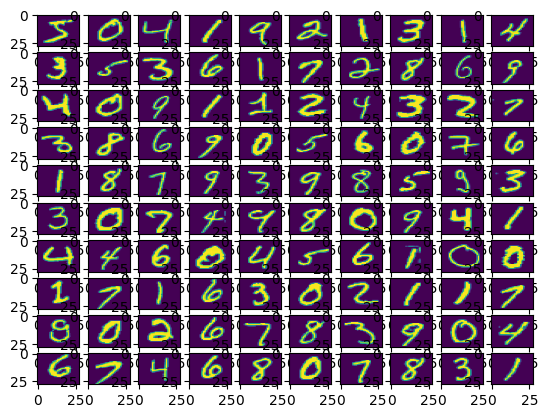

In [27]:
#a look at some observations
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1
plt.show()

In [28]:
#defining our model
#sequential = feed forward network
model = tf.keras.Sequential([
    
    # whats the first thing in a neural network --> Input!
    # This could be ANY number
    # Flatten will ensure each input is fed in one by one
    # reshape 28 row * 28 column data to 28*28 rows
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
      # dense(hidden) layer 1, define the number of neuron activation 
    tf.keras.layers.Dense(256, activation='sigmoid'),  
    
    # dense(hidden) layer 2
    tf.keras.layers.Dense(128, activation='sigmoid'), 
    
      # output layer
      # in the this layer you have to put in the exact number of neutrons
      # in this case its ten because me have ten outputs : 0 - 9
      # this is where we would specify bias
    tf.keras.layers.Dense(10, activation='sigmoid'),  
])

In [29]:
model

In [30]:
#we need to "compile" our model by specifying our optimizer(how it learns), 
#how to calculate our cost function(loss),
#and what our metric is

# We need three things: 1) Optimizer, 2) Loss, and 3) metric

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#we train our model like any other with a x_train and y_train
#epochs is how many times we update our weights
#batch size is how many observation to look at while preforming SGD
#we can define a validation split between our epochs to determine how well it does with out of sample data
#I am going to save our fit back to a variable for later use
history = model.fit(X_train, y_train, epochs=100, 
          batch_size=2000, 
          validation_split=0.2)

In [32]:
#final model score against our test data
results = model.evaluate(X_test,  y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.10391493886709213, 0.9686999917030334]


In [33]:
model.predict(tf.expand_dims(X_train[0], axis=0))

# These are the probabilities that the image is either [0-9],
# So you can see that the highest probability is that the image is a '5'

1/1 [==============================] - 0s 86ms/step


array([[0.00849378, 0.03699264, 0.00518403, 0.99908817, 0.00219812,
        0.9999658 , 0.00242643, 0.1161699 , 0.02440741, 0.11859734]],
      dtype=float32)

In [34]:
y_train[0]

# The model did well with that because it is indeed a '5'

5

In [38]:
history_df = pd.DataFrame(history.history)

In [36]:
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.578320,0.645792,0.962799,0.836583
1,0.736078,0.856083,0.520709,0.891000
2,0.460105,0.895187,0.374813,0.909333
3,0.355342,0.911729,0.309777,0.922583
4,0.302269,0.920687,0.272934,0.929083


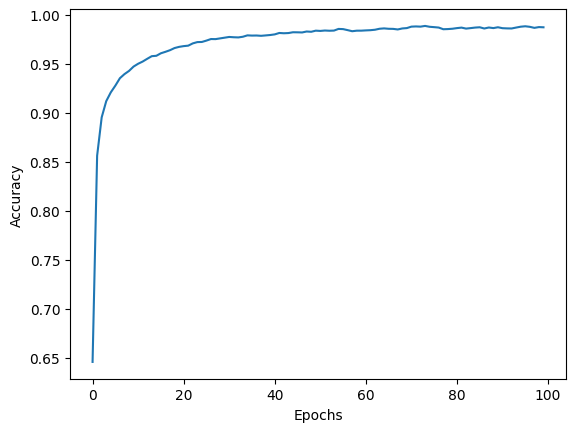

In [40]:
# It looks like our model is reaching the point of diminshing returns with epochs. Let's take a look
history_df.accuracy.plot()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

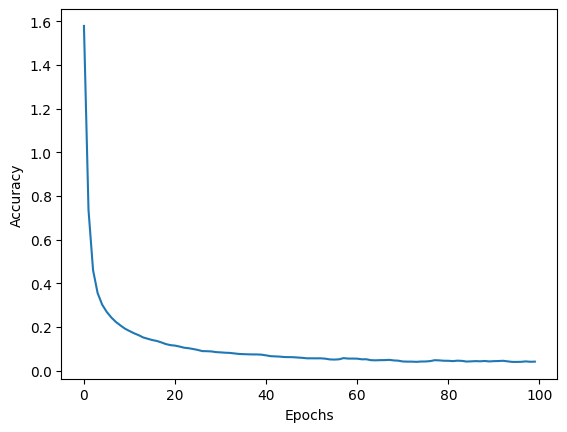

In [41]:
history_df.loss.plot()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# How can we stop it early if we don't need to contuniue training
#defining our model
#sequential = feed forward network
model2 = tf.keras.Sequential([
    
    # reshape 28 row * 28 column data to 28*28 rows
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
      # dense(hidden) layer 1
    tf.keras.layers.Dense(256, activation='sigmoid'),  
    
    # dense(hidden) layer 2
    tf.keras.layers.Dense(128, activation='sigmoid'), 
    
      # output layer
    tf.keras.layers.Dense(10, activation='sigmoid'),  
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history2 = model2.fit(X_train, y_train, epochs=100, 
          batch_size=2000, 
          validation_split=0.2,
          callbacks = [callback])

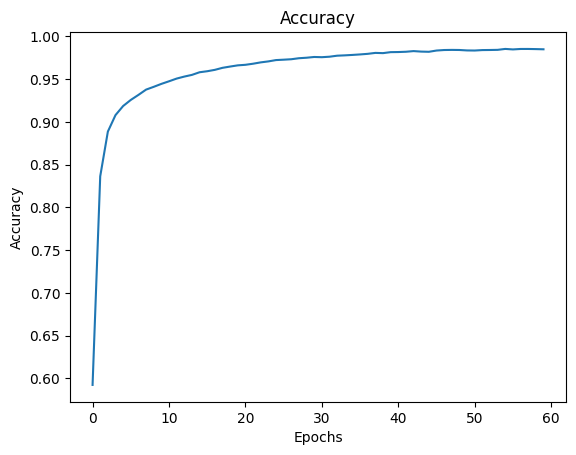

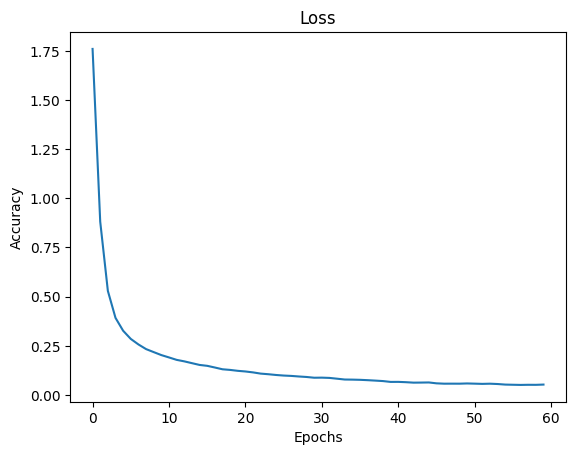

In [44]:
# stopped early!, Let's replot
history_df2 = pd.DataFrame(history2.history)

history_df2.accuracy.plot()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy")
plt.show()

history_df2.loss.plot()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Loss")
plt.show()